In [104]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex

In [105]:
k1 = 1
k2 = 4
k3 = 1
p1 = 2
p2 = 1.2
p3 = 1
q1 = 1
q2 = 2
q3 = 1.5

alpha1 = 1.5
alpha2 = 1.1

a = 0
b = 4

m1 = 2
m2 = 3
m3 = 3

n = 18 #12 15-18

In [106]:
x = sp.Symbol('x')
u = sp.Function('u')(x)

In [107]:
k = k1 * x ** k2 + k3
p = p1 * sp.sin(p2*x) + p3
q = q1 * sp.cos(q2*x) + q3

In [108]:
eq0 = -sp.diff(k*sp.diff(u, x), x) + p * sp.diff(u, x) + q * u 
eq1 = (-k * sp.diff(u, x) + alpha1 * u)
eq2 = (k * sp.diff(u, x) + alpha2 * u)

In [109]:
u1 = m1 * sp.sin(m2*x) +m3

In [110]:
f = sp.simplify(eq0.subs({u:u1}))
print(f)

-24*x**3*cos(3*x) + 18*(x**4 + 1)*sin(3*x) + 6*(2*sin(1.2*x) + 1)*cos(3*x) + (2*sin(3*x) + 3)*(cos(2*x) + 1.5)


In [111]:
mu1 = sp.simplify(eq1.subs({u:u1}).subs({x:a}))
mu1

-1.50000000000000

In [112]:
mu2 = sp.simplify(eq2.subs({u:u1}).subs({x:b})).evalf(2)
mu2

1.3e+3

In [113]:
r = sp.Symbol("r")
l = sp.Symbol("l")
v = r * x + l
v = v.subs(sp.solve([sp.Eq(sp.simplify(eq1.subs({u:v, x:a})), mu1), sp.Eq(sp.simplify(eq2.subs({u:v, x:b})), mu2)]))
v

4.97881108473682*x + 2.31920738982455

In [114]:
f1 = sp.simplify(f - eq0.subs({u:v}))
f1

-24*x**3*cos(3*x) + 19.9152443389473*x**3 - (4.97881108473682*x + 2.31920738982455)*(cos(2*x) + 1.5) + 18*(x**4 + 1)*sin(3*x) + 6*(2*sin(1.2*x) + 1)*cos(3*x) + (2*sin(3*x) + 3)*(cos(2*x) + 1.5) - 9.95762216947364*sin(1.2*x) - 4.97881108473682

In [115]:
C = sp.Symbol("C")
D = sp.Symbol("D")
phi1 = (x - a)**2 * (x - C)
phi2 = (x - D) * (b - x)**2

In [116]:
temp = sp.solve([sp.simplify(eq1.subs({u: phi2, x: a})).evalf(),
                    sp.simplify(eq2.subs({u: phi1, x: b})).evalf()],
                [C, D])

temp

{D: -0.500000000000000, C: 5.98302469135802}

In [117]:
def integrate_sum(integrate, x, a, b):
    steps = 100
    res = 0
    step = (b-a) / steps
    arg = a
    for i in range(steps):
        arg += step
        res += step * integrate.subs({x: arg})
    return res


def A(expr: sp.Expr, x, k, p, q): return -(k*expr.diff(x)).diff(x) + p*expr.diff(x) + q*expr

In [118]:
phi1 = phi1.subs(C, temp[C]).evalf()
phi2 = phi2.subs(D, temp[D]).evalf()

phin = [v, phi1, phi2]
for i in range(3, n+1):
    phin.append( ((x-a)**2) * ((b-x)**(i-1)))

left_matrix_bg = sp.Matrix(n, n, lambda i,j: integrate_sum(A(phin[j+1], x, k, p, q) * phin[i+1], x, a, b).evalf())
right_bg = sp.Matrix(n, 1, lambda i,j: integrate_sum(f1 * phin[i+1], x, a, b).evalf())

ci_bg = left_matrix_bg.LUsolve(right_bg)

left_matrix_nk = sp.Matrix(n, n,
                        lambda i, j: integrate_sum(A(phin[j + 1], x, k, p, q) *
                                                    A(phin[i + 1], x, k, p, q),
                                                    x, a, b).evalf())
right_nk = sp.Matrix(n, 1,
                            lambda i, j: integrate_sum(f1 * A(phin[i + 1], x, k, p, q),
                                                            x, a, b).evalf())

ci_nk = left_matrix_nk.LUsolve(right_nk)

result_bg = sum([phin[0]] + [ci_bg[i]*phin[i+1] for i in range(n)]).simplify()
result_nk = sum([phin[0]] + [ci_nk[i]*phin[i+1] for i in range(n)]).simplify()



In [119]:
result_bg = sum([phin[0]] + [ci_bg[i]*phin[i+1] for i in range(n)]).simplify()
result_nk = sum([phin[0]] + [ci_nk[i]*phin[i+1] for i in range(n)]).simplify()

In [120]:
print("Точність Бубнова-Гальоркiна: ", sp.sqrt(integrate_sum((u1-result_bg) ** 2, x, a, b)).evalf())
print("Точність найменших квадратiв: ", sp.sqrt(integrate_sum((u1-result_nk) ** 2, x, a, b)).evalf())

Точність Бубнова-Гальоркiна:  0.130474754699441
Точність найменших квадратiв:  0.130665826927988


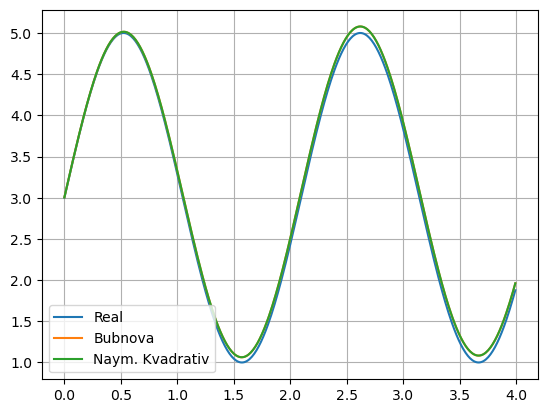

In [121]:
x_test = np.arange(a, b, 0.01)
y_bubnova = np.vectorize(lambda x_some: result_bg.subs(x, x_some))(x_test)
y_kvadr = np.vectorize(lambda x_some: result_nk.subs(x, x_some))(x_test)
y_real = np.vectorize(lambda x_some: u1.subs(x, x_some))(x_test)

plt.grid()
plt.plot(x_test, y_real, label="Real")
plt.plot(x_test, y_bubnova, label="Bubnova")
plt.plot(x_test, y_kvadr, label="Naym. Kvadrativ")
plt.legend()
plt.savefig(fname="{}".format(n))
plt.show()